In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:

#df1 includes both active and inactive players
df1 = pd.read_csv('NBA_AllTimeLeader.csv')
#df2 includes only active players
df2 = pd.read_csv('NBA_AllTimeLeader_Active.csv')
hof = []
with open('HOF.csv', 'r') as f:
    for line in f:
        hof.append(line.strip())

In [3]:
hof

['Kareem Abdul-Jabbar',
 'Ray Allen',
 'Nate Archibald',
 'Paul Arizin',
 'Al Attles',
 'Charles Barkley',
 'Don Barksdale',
 'Rick Barry',
 'Elgin Baylor',
 'Zelmo Beaty',
 'Walt Bellamy',
 'Dave Bing',
 'Larry Bird',
 'Chris Bosh',
 'Bill Bradley',
 'Carl Braun',
 'Kobe Bryant',
 'Al Cervi',
 'Wilt Chamberlain',
 'Maurice Cheeks',
 'Nat Clifton',
 'Chuck Cooper',
 'Bob Cousy',
 'Dave Cowens',
 'Billy Cunningham',
 'Louie Dampier',
 'Bob Dandridge',
 'Mel Daniels',
 'Adrian Dantley',
 'Bob Davies',
 'Dave DeBusschere',
 'Vlade Divac',
 'Clyde Drexler',
 'Joe Dumars',
 'Tim Duncan',
 'Alex English',
 'Julius Erving',
 'Patrick Ewing',
 'Walt Frazier',
 'Joe Fulks',
 'Harry Gallatin',
 'Kevin Garnett',
 'George Gervin',
 'Artis Gilmore',
 'Tom Gola',
 'Gail Goodrich',
 'Hal Greer',
 'Richie Guerin',
 'Cliff Hagan',
 'John Havlicek',
 'Connie Hawkins',
 'Elvin Hayes',
 'Spencer Haywood',
 'Tom Heinsohn',
 'Grant Hill',
 'Bob Houbregs',
 'Bailey Howell',
 'Dan Issel',
 'Allen Iverson',
 '

In [4]:
#drop duplicates from merging pts, ast, steal, reb, blk all-times
df1 = df1.drop_duplicates(subset='PLAYER')
df2 = df2.drop_duplicates(subset='PLAYER')

In [5]:
df1['HOF'] = [1.0 if player in hof else 0.0 for player in df1['PLAYER']]

In [6]:
df1['GP'] = pd.to_numeric(df1['GP'].str.replace(',',''))
df2['GP'] = pd.to_numeric(df2['GP'].str.replace(',',''))

In [7]:
df1 = df1.replace('-', np.NaN)

In [8]:
df1

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,2975,9394,17440,5660,1160,3189,2527,55.9,59.2,1.0
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,...,3562,11406,14968,5248,2085,1145,4524,51.8,57.7,1.0
2,3,LeBron James,1325,50605,35757,13051,25900,50.4,2020,5856,...,1548,8290,9838,9799,2092,994,4646,54.3,58.7,0.0
3,4,Kobe Bryant,1346,48643,33643,11719,26200,44.7,1827,5546,...,1499,5548,7047,6306,1944,640,4010,48.2,55.0,1.0
4,5,Michael Jordan,1072,41010,32292,12192,24537,49.7,581,1778,...,1668,5004,6672,5633,2514,893,2924,50.9,56.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,424,Trae Young,229,7603,5578,1786,4117,43.4,566,1623,...,152,748,900,2043,213,38,957,50.3,57.5,0.0
5474,227,Kristaps Porzingis,304,9445,5694,2057,4655,44.2,552,1546,...,527,1849,2376,455,212,577,499,50.1,54.6,0.0
5477,231,Keon Clark,353,7973,2882,1179,2359,50.0,1,19,...,655,1441,2096,322,184,571,470,50.0,53.1,0.0
5489,242,Jawann Oldham,329,5241,1455,608,1269,47.9,0,3,...,431,922,1353,162,97,546,362,47.9,50.4,0.0


In [9]:
df2

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
0,1,LeBron James,1325,50605,35757,13051,25900,50.4,2020,5856,...,1548,8290,9838,9799,2092,994,4646,54.3,58.7,0
1,2,Carmelo Anthony,1218,42471,27736,9923,22205,44.7,1647,4636,...,1944,5687,7631,3378,1196,607,3016,48.4,54.2,0
2,3,Kevin Durant,908,33333,24567,8388,16934,49.5,1696,4421,...,642,5779,6421,3811,989,1005,2847,54.5,61.5,0
3,4,James Harden,903,31140,22587,6667,15040,44.3,2509,6918,...,710,4290,5000,5980,1403,493,3385,52.7,61.1,0
4,5,Russell Westbrook,970,33719,22384,7971,18211,43.8,1099,3592,...,1615,5555,7170,8292,1656,299,4018,46.8,52.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Tyus Jones,408,7342,2359,911,2108,43.2,243,705,...,91,599,690,1476,401,33,300,49.0,52.1,0
317,34,Kristaps Porzingis,304,9445,5694,2057,4655,44.2,552,1546,...,527,1849,2376,455,212,577,499,50.1,54.6,0
613,45,Ben Simmons,275,9326,4382,1784,3188,56.0,5,34,...,523,1694,2217,2127,464,199,925,56.0,57.9,0
615,47,Trae Young,230,7639,5609,1796,4144,43.3,568,1631,...,157,750,907,2053,215,38,964,50.2,57.4,0


In [10]:
#Exclude active players because they 
#can't be in Hall of Fame until retired
df = df1[~df1.PLAYER.isin(df2.PLAYER)]

In [11]:
train = df[df1.columns]
print(train.isna().sum())

#           0
PLAYER      0
GP          0
MIN         0
PTS         0
FGM         0
FGA         0
FG%         0
3PM       212
3PA       212
3P%       212
FTM         0
FTA         0
FT%         0
OREB      119
DREB      119
REB         0
AST         0
STL       119
BLK       119
TOV       187
EFG%        0
TS%         0
HOF         0
dtype: int64


In [12]:
for index, value in train.isna().sum().items():
    if value > 0:
        train[index] = train[index].fillna(train[index].median())

In [13]:
print(train.isna().sum())

#         0
PLAYER    0
GP        0
MIN       0
PTS       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TOV       0
EFG%      0
TS%       0
HOF       0
dtype: int64


In [14]:
train = train.drop(columns=['PLAYER', '#'])
train = train.astype('float32')

In [15]:
corr = train.drop(columns = ['HOF']).corrwith(train['HOF']).abs().sort_values(ascending=False)

In [16]:
corr

FTA     0.593447
FTM     0.588554
PTS     0.537693
FGM     0.527236
FGA     0.525644
REB     0.446895
MIN     0.435353
AST     0.370423
TOV     0.308770
GP      0.291468
DREB    0.272856
STL     0.246769
BLK     0.218157
OREB    0.215820
FT%     0.074161
TS%     0.063506
FG%     0.061337
EFG%    0.040823
3P%     0.018963
3PM     0.011791
3PA     0.004862
dtype: float64

<BarContainer object of 21 artists>

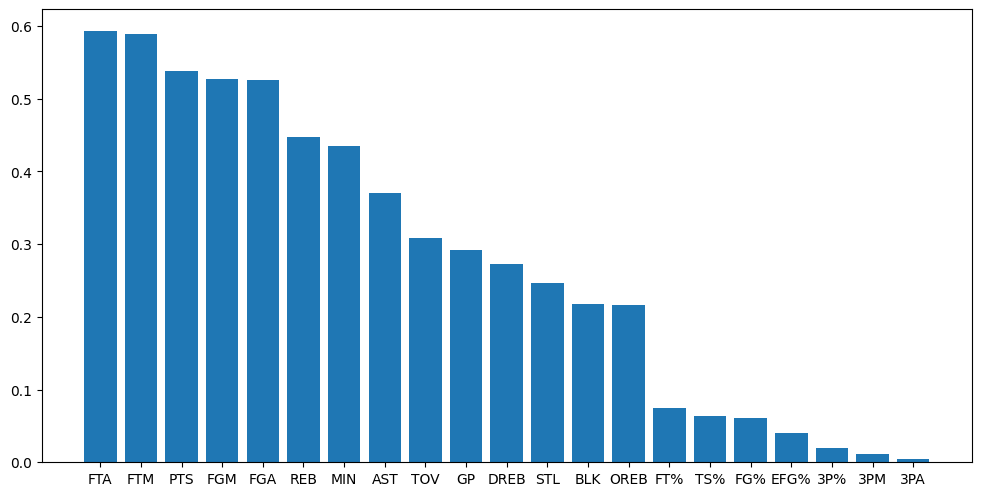

In [17]:
plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x=corr.index, height=corr)

In [18]:
train = train.drop(columns = corr.index[-7:])

In [19]:
#unused for now
def normalize(df) :
    x = df.values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=df.columns)

In [20]:
training_set = train.sample(frac=0.7, random_state=25)
training_set.head()

,GP,MIN,PTS,FGM,FGA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,HOF
507,735.0,19642.0,8208.0,3432.0,7023.0,1343.0,1808.0,1487.0,4095.0,5582.0,921.0,322.0,931.0,1544.0,0.0
1233,449.0,10544.0,2527.0,950.0,1767.0,626.0,1183.0,1122.0,2071.0,3193.0,661.0,361.0,248.0,526.0,0.0
426,807.0,21910.0,9223.0,3588.0,7224.0,2046.0,2837.0,1459.0,4604.0,6063.0,1070.0,522.0,1581.0,1847.0,0.0
1251,414.0,1352.0,2388.0,966.0,3557.0,456.0,702.0,695.0,1715.0,533.0,539.0,483.0,216.0,919.0,0.0
1012,598.0,12732.0,4141.0,1789.0,3531.0,515.0,601.0,196.0,621.0,817.0,1962.0,439.0,19.0,657.0,0.0


In [21]:
dev_set = train.drop(training_set.index)
dev_set.head()

,GP,MIN,PTS,FGM,FGA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,HOF
0,1560.0,57446.0,38387.0,15837.0,28307.0,6712.0,9304.0,2975.0,9394.0,17440.0,5660.0,1160.0,3189.0,2527.0,1.0
3,1346.0,48643.0,33643.0,11719.0,26200.0,8378.0,10011.0,1499.0,5548.0,7047.0,6306.0,1944.0,640.0,4010.0,1.0
10,1303.0,50000.0,27313.0,10976.0,24272.0,5356.0,7999.0,2778.0,6973.0,16279.0,2398.0,864.0,1771.0,1358.0,1.0
12,1040.0,43886.0,26710.0,9508.0,19620.0,7694.0,9185.0,71.0,208.0,7804.0,9887.0,77.0,4.0,919.0,1.0
16,1270.0,46471.0,26395.0,10513.0,23930.0,5369.0,6589.0,610.0,1389.0,8007.0,6114.0,476.0,117.0,204.0,1.0


In [22]:
train_set_y = training_set["HOF"]
train_set_x = training_set.drop(columns = ["HOF"])
dev_set_y = dev_set["HOF"]
dev_set_x = dev_set.drop(columns = ["HOF"])

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
train_X = train_set_x.to_numpy()
train_Y = train_set_y.to_numpy()
logreg.fit(train_X, train_Y)
train_y_pred = logreg.predict(train_X)
score = logreg.score(train_X, train_Y)
print(score)

0.9388753056234719


C:\Users\nahte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn import metrics
test_X = dev_set_x.to_numpy()
test_Y = dev_set_y.to_numpy()
test_y_pred = logreg.predict(test_X)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_Y, test_y_pred)

In [25]:
print("Accuracy:",metrics.accuracy_score(test_Y, test_y_pred))
print("Precision:",metrics.precision_score(test_Y, test_y_pred))
print("Recall:",metrics.recall_score(test_Y, test_y_pred))

Accuracy: 0.9285714285714286
Precision: 0.7058823529411765
Recall: 0.6153846153846154


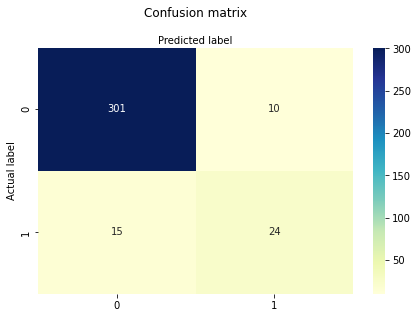

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Logreg.png')

## Predict whether active players will be in HOF

In [27]:
active = df2[train_set_x.columns]

In [28]:
print(active.isna().sum())

GP      0
MIN     0
PTS     0
FGM     0
FGA     0
FTM     0
FTA     0
OREB    0
DREB    0
REB     0
AST     0
STL     0
BLK     0
TOV     0
dtype: int64


In [29]:
active_pred = logreg.predict(active)

C:\Users\nahte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [30]:
print(list(zip(df2['PLAYER'], active_pred)))

[('LeBron James', 1.0), ('Carmelo Anthony', 1.0), ('Kevin Durant', 1.0), ('James Harden', 1.0), ('Russell Westbrook', 1.0), ('Chris Paul', 1.0), ('LaMarcus Aldridge', 1.0), ('Dwight Howard', 1.0), ('Stephen Curry', 1.0), ('DeMar DeRozan', 0.0), ('Damian Lillard', 1.0), ('Rudy Gay', 0.0), ('Lou Williams', 0.0), ('Paul George', 1.0), ('Kyle Lowry', 1.0), ('Paul Millsap', 0.0), ('Kemba Walker', 1.0), ('Brook Lopez', 0.0), ('Blake Griffin', 1.0), ('Anthony Davis', 1.0), ('Andre Iguodala', 0.0), ('Bradley Beal', 1.0), ('Thaddeus Young', 0.0), ('Mike Conley', 0.0), ('Kevin Love', 1.0), ('Kyrie Irving', 1.0), ('Giannis Antetokounmpo', 1.0), ('Jeff Green', 0.0), ('Jrue Holiday', 0.0), ('Al Horford', 0.0), ('DeMarcus Cousins', 1.0), ('Derrick Rose', 0.0), ('Goran Dragic', 0.0), ('Klay Thompson', 0.0), ('Eric Gordon', 0.0), ('John Wall', 1.0), ('Nikola Vucevic', 0.0), ('Trevor Ariza', 0.0), ('Jimmy Butler', 1.0), ('Tobias Harris', 0.0), ('Gordon Hayward', 0.0), ('Kawhi Leonard', 1.0), ('Danilo G